In [85]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [57]:
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50%; !important;}</style>"
HTML(style)

In [143]:
train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [144]:
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [145]:
X_train = train_data.drop(['species'], axis=1)
y_train = train_data.species
X_test = test_data.drop(['species'], axis=1)
y_test = test_data.species

In [146]:
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [150]:
np.random.seed(0)

In [151]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [125]:
X_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
0,130,7.4,2.8,6.1,1.9
1,7,5.0,3.4,1.5,0.2
2,11,4.8,3.4,1.6,0.2
3,142,5.8,2.7,5.1,1.9
4,109,7.2,3.6,6.1,2.5


In [63]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
clf.score(X_train,y_train)

0.9798657718120806

In [65]:
clf.score(X_test, y_test)

0.7694915254237288

In [70]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [71]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
clf.score(X_train,y_train)

0.8238255033557047

In [73]:
clf.score(X_test, y_test)

0.8203389830508474

In [116]:
max_depth_values = range(1,100)

In [148]:
scores_data = pd.DataFrame()

In [152]:
for max_depth in max_depth_values:
    np.random.seed(0)
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test, y_test)
    
    #mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    })
    scores_data = scores_data.append(temp_score_data)

In [153]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.94


In [154]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')

In [155]:
scores_data_long.query("set_type == 'cross_val_score'").head(15)

,max_depth,set_type,score


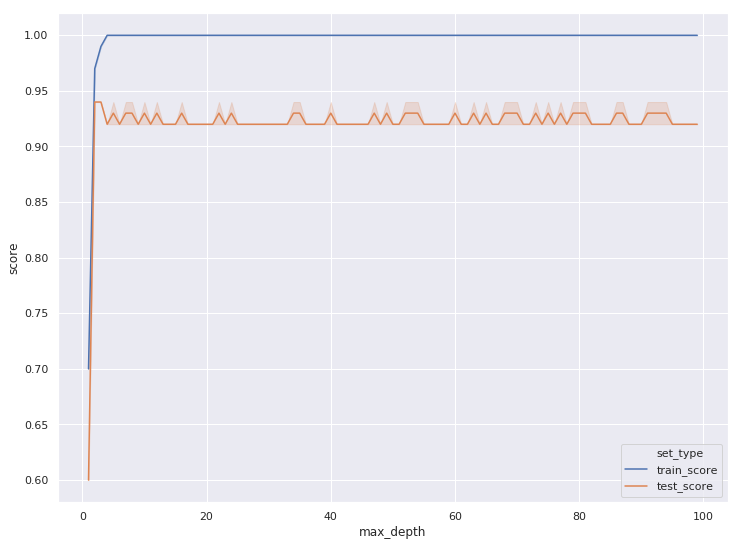

In [156]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [100]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [101]:
cross_val_score(best_clf, X_train, y_train, cv=5).mean()

0.7868568105208185

In [123]:
sns.set(rc={'figure.figsize': (12,9)})

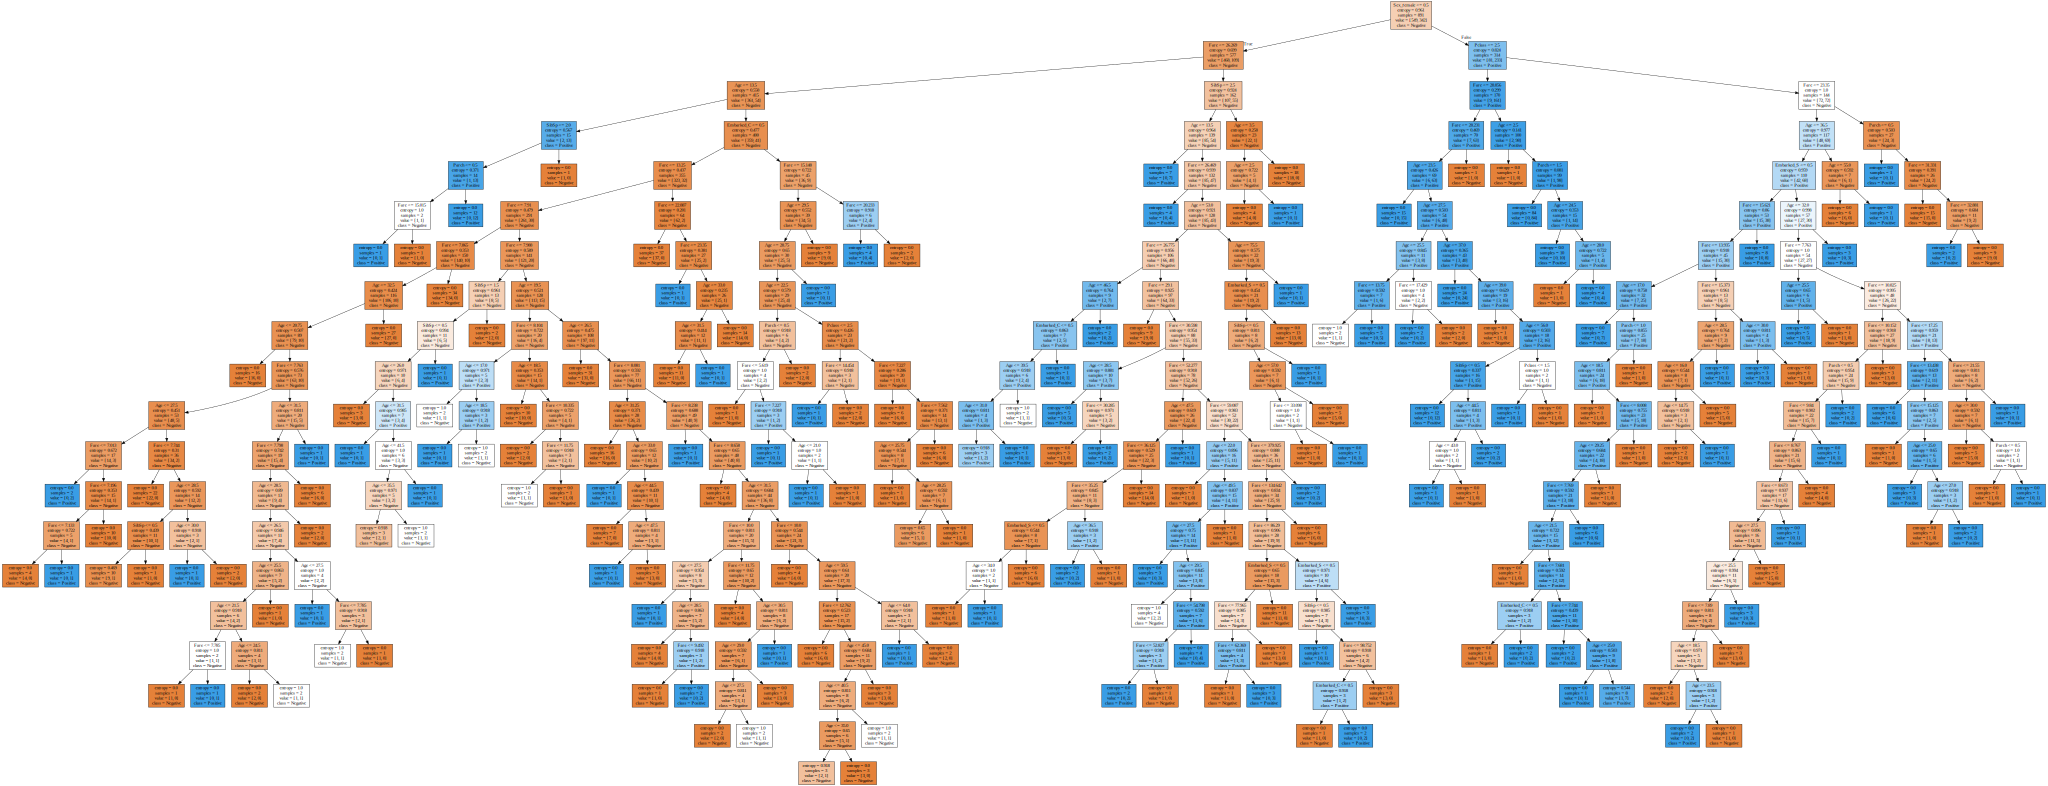

In [58]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [24]:
-1/4*np.log2(1/4)-3/4*np.log2(3/4)

0.8112781244591328

In [28]:
data2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', as_index=0)

TypeError: parser_f() got an unexpected keyword argument 'as_index'

In [26]:
data2.head()

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
